<h2 style="text-align:center; font-weight: 700;">Optimizers for Supervised Deep Learning models</h2>

In [86]:
import numpy as np
import math
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm

#### Input

In [87]:
X, Y = [0.5, 2.5, 1.8, 2.2, 2.8], [0.2, 0.9, 0.65, 0.8, 1]
noofepochs = 60

#### Necessary auxiliary functions

##### Activation -> Binary Sigmoidal

In [88]:
def binary_sigmoidal(yin):
  return (1 / (1 + np.exp(-yin)))

##### Predictor function

In [89]:
def predict_y(x, w, b):
  if type(x) == list or type(x) == tuple:
    yin = np.dot(x, w) + b
  else:
    yin = x * w + b
  yhat = binary_sigmoidal(yin)
  return yhat

##### Gradient functions

In [90]:
def delta_w(x, y, yhat):
  return (-2 * (y - yhat) * (yhat * (1 - yhat)) * x)

def delta_b(y, yhat):
  return (-2 * (y - yhat) * (yhat * (1 - yhat)))

#### Function to plot Error vs. Weight and Bias

In [91]:
def plotter(yhats, errors, weights, biases):
  fig = plt.figure(figsize=(20, 7))
  ax = plt.axes(projection = '3d')
  ax.set_xlabel("Weight (w)")
  ax.set_ylabel("Bias (b)")
  ax.set_zlabel("Squared Loss")
  ax.plot3D(np.array(weights), np.array(biases), np.array(errors), marker='o', markersize=2)
  plt.show()

  fig = plt.figure(figsize=(4, 2.5))
  plt.xlabel("Epochs")
  plt.ylabel("Error")
  plt.title("Squared error v/s Epochs")
  plt.plot([i for i in range(len(errors))], errors)

#### Stochastic Gradient Descent

In [92]:
def stochastic_gd(X, Y, noofepochs = 300):
  w, b = -2, -2     # weight and bias
  α = 1           # learning rate
  
  y_hats, errors, weights, biases = [], [], [], []
  for epoch in range(noofepochs):

    # for each epoch there is an updation noofrows times, here 2 => 300 x 2 = 600 calcs
    for x, y in zip(X, Y):
      yhat = predict_y(x, w, b)
      sqerror = (y - yhat) ** 2
      w += (-α * delta_w(x, y, yhat))
      b += (-α * delta_b(y, yhat))
    
    y_hats.append(yhat)
    errors.append(sqerror)
    weights.append(w)
    biases.append(b)

  return y_hats, errors, weights, biases

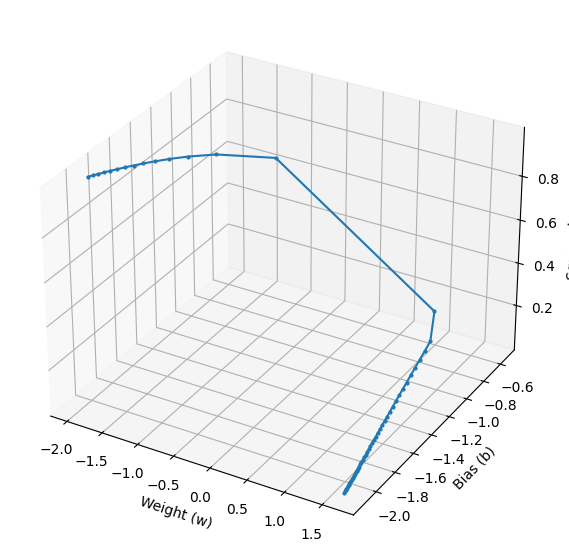

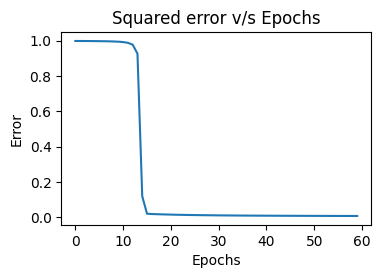

In [93]:
y_hats_sgd, errors_sgd, weights_sgd, biases_sgd = stochastic_gd(X, Y, noofepochs)
plotter(y_hats_sgd, errors_sgd, weights_sgd, biases_sgd)

#### Batch Gradient Descent

In [94]:
def batch_gd(X, Y, noofepochs = 300):
  w, b = -2, -2     # weight and bias
  α = 1           # learning rate
  dw, db = 0, 0
  y_hats, errors, weights, biases = [], [], [], []
  for epoch in range(noofepochs):

    # for each epoch there is an updation exactly once
    for x, y in zip(X, Y):
      yhat = predict_y(x, w, b)
      sqerror = (y - yhat) ** 2
      dw += delta_w(x, y, yhat)
      db += delta_b(y, yhat)
    
    w += -α * (dw / 2)        # knowingly halving it cause only 2 points
    b += -α * (db / 2)
    dw, db = 0, 0
    y_hats.append(yhat)
    errors.append(sqerror)
    weights.append(w)
    biases.append(b)

  return y_hats, errors, weights, biases

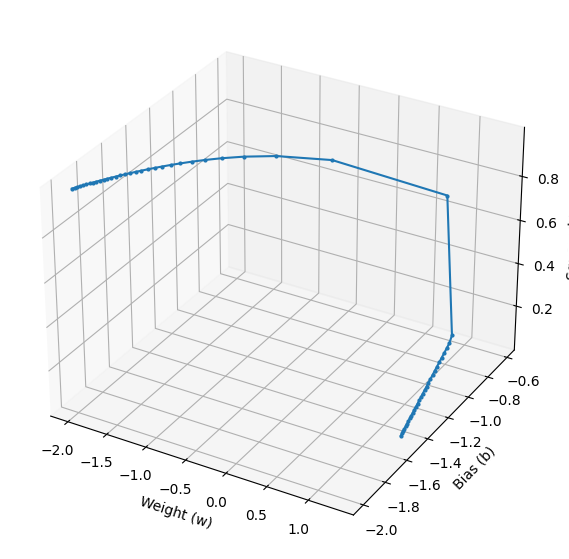

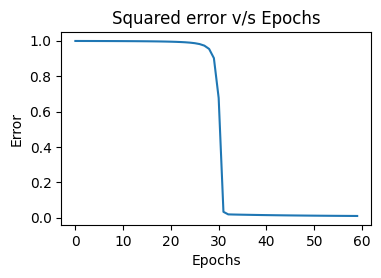

In [95]:
y_hats_bgd, errors_bgd, weights_bgd, biases_bgd = batch_gd(X, Y, noofepochs)
plotter(y_hats_bgd, errors_bgd, weights_bgd, biases_bgd)

#### Mini-batch Gradient Descent

In [96]:
def mini_batch_gd(X, Y, noofepochs = 300, batch_size = 2):
  w, b = -2, -2     # weight and bias
  α = 1           # learning rate
  dw, db = 0, 0
  curr_count = 0
  y_hats, errors, weights, biases = [], [], [], []

  for epoch in range(noofepochs):
    for x, y in zip(X, Y):
      yhat = predict_y(x, w, b)
      sqerror = (y - yhat) ** 2
      dw += delta_w(x, y, yhat)
      db += delta_b(y, yhat)
      curr_count += 1
      if curr_count % batch_size == 0:
        w += -α * (dw / batch_size)
        b += -α * (db / batch_size)
        dw, db = 0, 0
        
    y_hats.append(yhat)
    errors.append(sqerror)
    weights.append(w)
    biases.append(b)

  return y_hats, errors, weights, biases

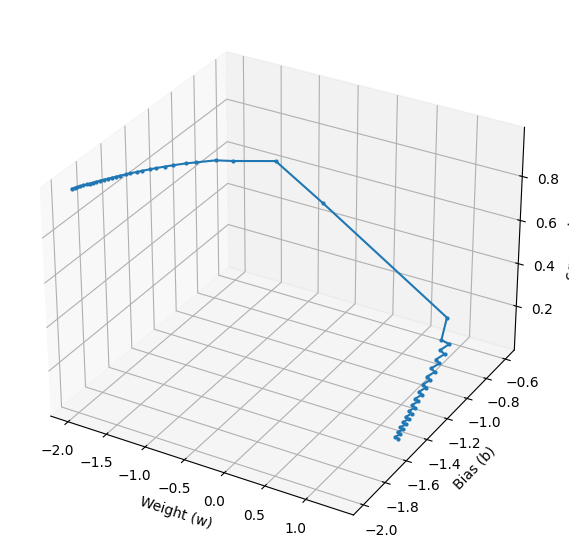

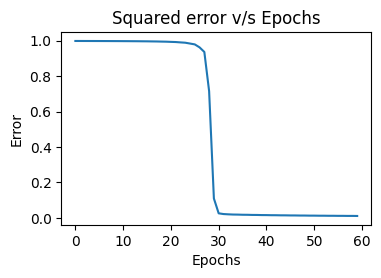

In [97]:
y_hats_mbgd, errors_mbgd, weights_mbgd, biases_mbgd = mini_batch_gd(X, Y, noofepochs)
plotter(y_hats_mbgd, errors_mbgd, weights_mbgd, biases_mbgd)

#### Stochastic Gradient Descent w/ Momentum

In [98]:
def stochastic_gd_w_momentum(X, Y, noofepochs = 300, ß = 0.5):
  w, b = -2, -2
  α = 1
  dw, db, vw, vb = 0, 0, 0, 0
  y_hats, errors, weights, biases = [], [], [], []
  
  for i in range(noofepochs):
    for x, y in zip(X, Y):
      yhat = predict_y(x, w, b)
      sqerror = (y - yhat) ** 2
      dw = delta_w(x, y, yhat)
      db = delta_b(y, yhat)
      vw = ß * vw + (1 - ß) * dw
      vb = ß * vb + (1 - ß) * db
      w += (-α * vw)
      b += (-α * vb)
    y_hats.append(yhat)
    errors.append(sqerror)
    weights.append(w)
    biases.append(b)
  return y_hats, errors, weights, biases

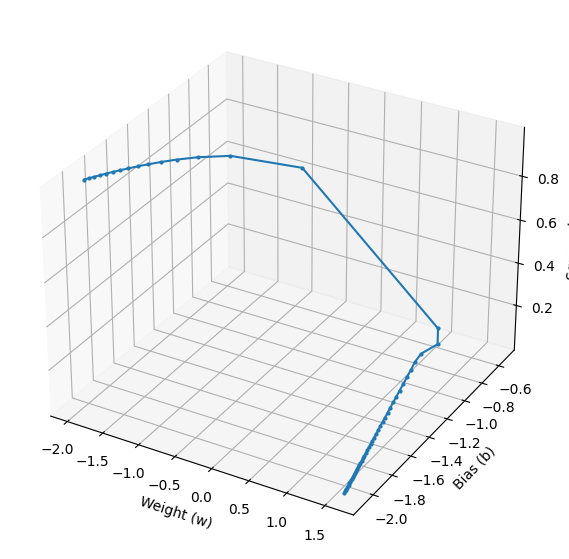

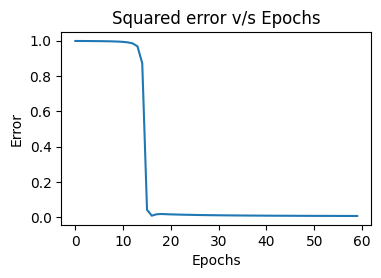

In [99]:
y_hats_sgdm, errors_sgdm, weights_sgdm, biases_sgdm = stochastic_gd_w_momentum(X, Y, noofepochs)
plotter(y_hats_sgdm, errors_sgdm, weights_sgdm, biases_sgdm)

#### Nesterov Accelerated Gradient Descent

In [100]:
def na_gd(X, Y, noofepochs = 300, ß = 0.5):
  α, w, b = 1, -2, -2
  dw, db, vw, vb = 0, 0, 0, 0
  y_hats, errors, weights, biases = [], [], [], []
  
  for i in range(noofepochs):
    for x, y in zip(X, Y):
      w_temp = w - ß * vw      # history first
      b_temp = b - ß * vb
      yhat = predict_y(x, w_temp, b_temp)       # it's "change" returned will be lesser cause already w has changed
      sqerror = (y - yhat) ** 2
      dw = delta_w(x, y, yhat)                  # as y_hat is used in calc. of dw, if w_temp was used in y_hat then dw is w.r.t w_temp which is what we want
      db = delta_b(y, yhat)
      w += (-α * dw)            # current derivative second
      b += (-α * db)
      vw = ß * vw + (1 - ß) * dw      # updating the history too
      vb = ß * vb + (1 - ß) * db
    y_hats.append(yhat)
    errors.append(sqerror)
    weights.append(w)
    biases.append(b)
  return y_hats, errors, weights, biases

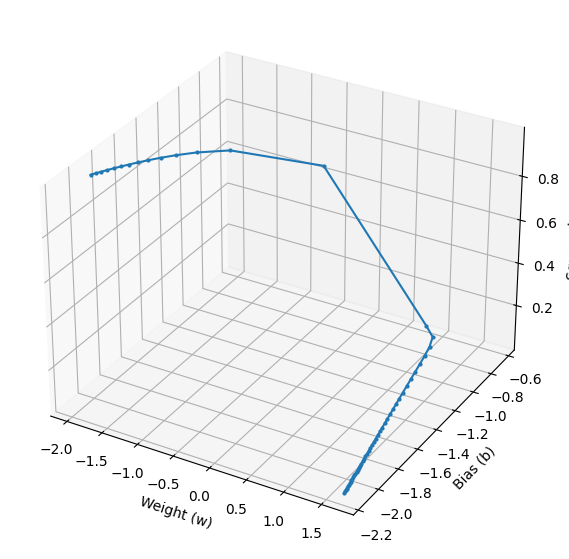

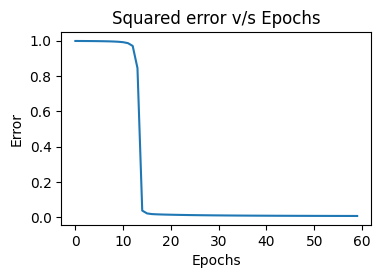

In [101]:
y_hats_nagd, errors_nagd, weights_nagd, biases_nagd = na_gd(X, Y, noofepochs)
plotter(y_hats_nagd, errors_nagd, weights_nagd, biases_nagd)

#### Adaptive Gradient (Adagrad) Optimizer

In [102]:
def adagrad(X, Y, noofepochs = 300, ε = 0.5):
  α, w, b = 1, -2, -2
  dw, db, dw_sq, db_sq = 0, 0, 0, 0, 
  y_hats, errors, weights, biases = [], [], [], []
  
  for i in range(noofepochs):
    for x, y in zip(X, Y):
      yhat = predict_y(x, w, b)
      sqerror = (y - yhat) ** 2
      dw = delta_w(x, y, yhat)
      db = delta_b(y, yhat)
      dw_sq += dw ** 2
      db_sq += db ** 2
      w += (-α / (dw_sq + ε) ** 0.5) * dw
      b += (-α / (db_sq + ε) ** 0.5) * db
    
    dw_sq, db_sq = 0, 0 
    y_hats.append(yhat)
    errors.append(sqerror)
    weights.append(w)
    biases.append(b)
  return y_hats, errors, weights, biases

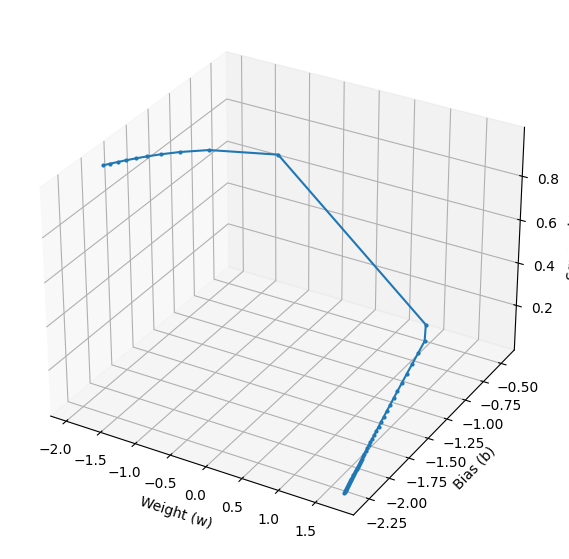

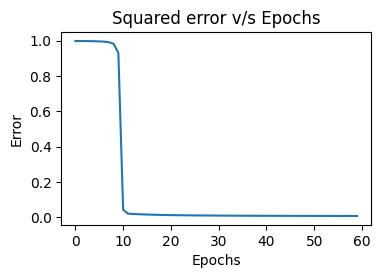

In [103]:
y_hats_adag, errors_adag, weights_adag, biases_adag = adagrad(X, Y, noofepochs)
plotter(y_hats_adag, errors_adag, weights_adag, biases_adag)

#### Adaptive Delta (AdaDelta) - Root Mean Square Propagation(RMSProp) Optimizer

In [104]:
def ada_delta(X, Y, noofepochs = 300, ß = 0.5, ε = 0.5):
  α, w, b = 1, -2, -2
  dw, db, vw, vb = 0, 0, 0, 0
  y_hats, errors, weights, biases = [], [], [], []
  
  for i in range(noofepochs):
    for x, y in zip(X, Y):
      yhat = predict_y(x, w, b)
      sqerror = (y - yhat) ** 2
      dw = delta_w(x, y, yhat)
      db = delta_b(y, yhat)
      vw = ß * vw + (1 - ß) * (dw ** 2)
      w += (-α / (vw + ε) ** 0.5) * dw
      vb = ß * vb + (1 - ß) * (db ** 2)
      b += (-α / (vb + ε) ** 0.5) * db
    
    y_hats.append(yhat)
    errors.append(sqerror)
    weights.append(w)
    biases.append(b)
  return y_hats, errors, weights, biases

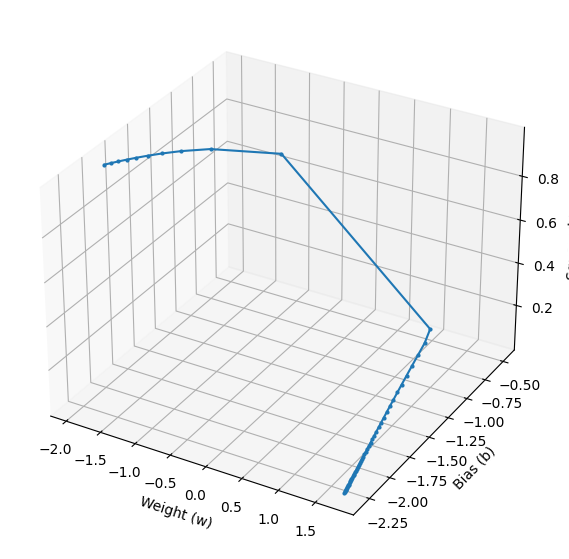

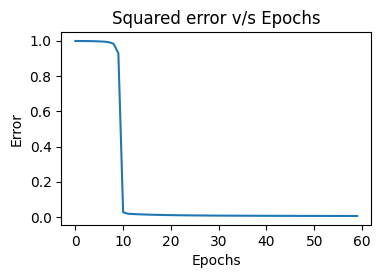

In [105]:
y_hats_adadelta, errors_adadelta, weights_adadelta, biases_adadelta = ada_delta(X, Y, noofepochs)
plotter(y_hats_adadelta, errors_adadelta, weights_adadelta, biases_adadelta)

#### Adaptive Momentum (Adam) Optimizer

In [106]:
def adam(X, Y, noofepochs = 300, ß1 = 0.5, ß2 = 0.5, ε = 0.5):
  α, w, b, t = 1, -2, -2, 0
  dw, db, mw, mb, vw, vb = 0, 0, 0, 0, 0, 0                     # m_ is momentum relating to the gradient, v_ is momentum relating/operating on the learning rate
  y_hats, errors, weights, biases = [], [], [], []
  
  for i in range(noofepochs):
    for x, y in zip(X, Y):
      t += 1
      yhat = predict_y(x, w, b)
      sqerror = (y - yhat) ** 2
      dw = delta_w(x, y, yhat)
      db = delta_b(y, yhat)
      
      mw = ß1 * mw + (1 - ß1) * dw
      # mw_hat = mw / 1 - (ß1 ** t)             # bias correction
      vw = ß2 * vw + (1 - ß2) * (dw ** 2)
      # vw_hat = vw / 1 - (ß2 ** t)               # vw is negative and with very small ε   
      # w += (-α * mw_hat) / (vw_hat + ε) ** 0.5
      w += (-α * mw) / (vw + ε) ** 0.5
      
      mb = ß1 * mb + (1 - ß1) * db
      # mb_hat = mb / 1 - (ß1 ** t)             # bias correction
      vb = ß2 * vb + (1 - ß2) * (db ** 2)
      # vb_hat = vb / 1 - (ß2 ** t)             
      b += (-α * mb) / (vb + ε) ** 0.5

    t = 0
    y_hats.append(yhat)
    errors.append(sqerror)
    weights.append(w)
    biases.append(b)
  return y_hats, errors, weights, biases

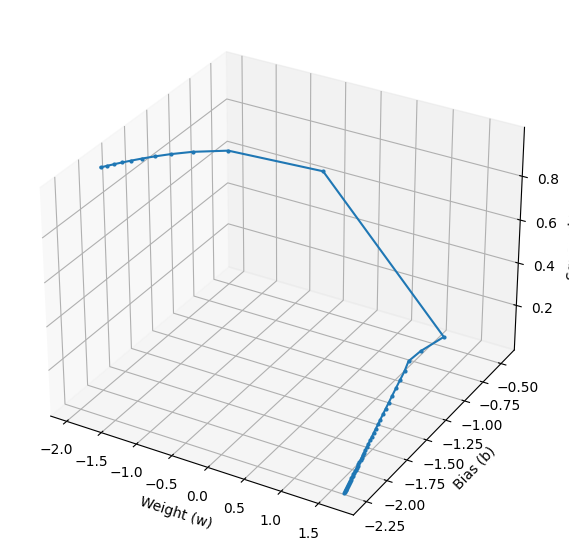

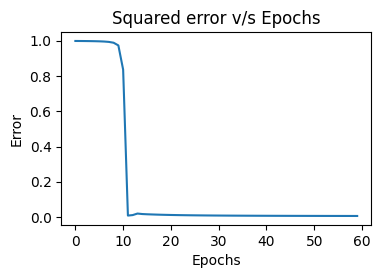

In [107]:
y_hats_adam, errors_adam, weights_adam, biases_adam = adam(X, Y, noofepochs)
plotter(y_hats_adam, errors_adam, weights_adam, biases_adam)

<p style="font-family: Poppins, Arial; font-weight: bold; color: hotpink; font-size: 25px">Collective Results</p>

In [108]:
def collective_plotter_2D(epoch_range: list[int], list_collections: list[list[float | int]], start_value: int | float, colors: list[str], plot_title: str, x_label: str, y_label: str, legend: list[str]) -> None:
  plt.figure(figsize = (15, 8))
  plt.xlabel(x_label, fontsize = 14)
  plt.ylabel(y_label, fontsize = 14)
  plt.title(plot_title)
  
  for i in range(len(list_collections)):
    plt.plot(epoch_range, [start_value, *list_collections[i]], color = colors[i])
  plt.legend(legend, loc = "best")

In [109]:
start_weight, start_error = -2, 1
plot_colors = ['orange', 'grey', 'pink', '#cc7722', 'green', 'cyan', 'blue', 'red']
plot_epoch_range = [i for i in range(0, noofepochs + 1)]
plot_legend = ["Batch GD", "Stochastic GD", "Mini-Batch GD", "SGD w/ Momentum", "Nesterov Accelerated GD", "Adagrad", "AdaDelta", "Adam"]

#### Weights v/s Epochs

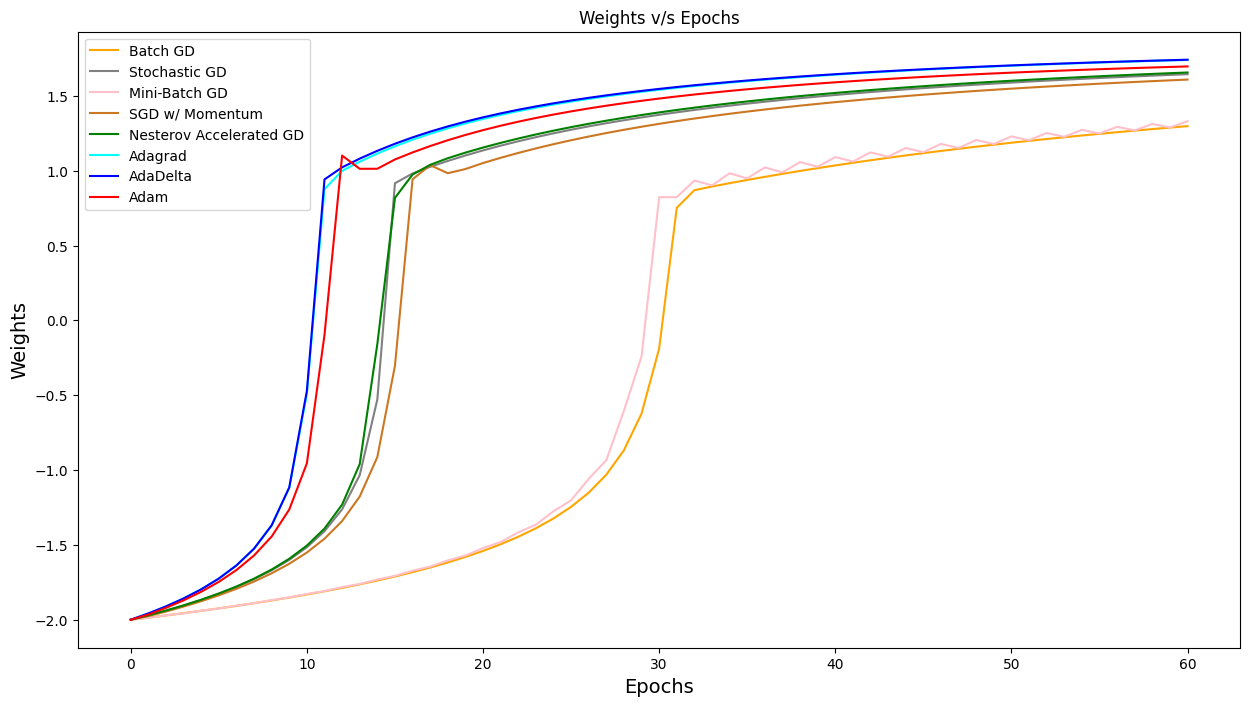

In [110]:
collective_plotter_2D(plot_epoch_range, [weights_bgd, weights_sgd, weights_mbgd, weights_sgdm, weights_nagd, weights_adag, weights_adadelta, weights_adam], start_weight, plot_colors, "Weights v/s Epochs", "Epochs", "Weights", plot_legend)

#### Errors v/s Epochs

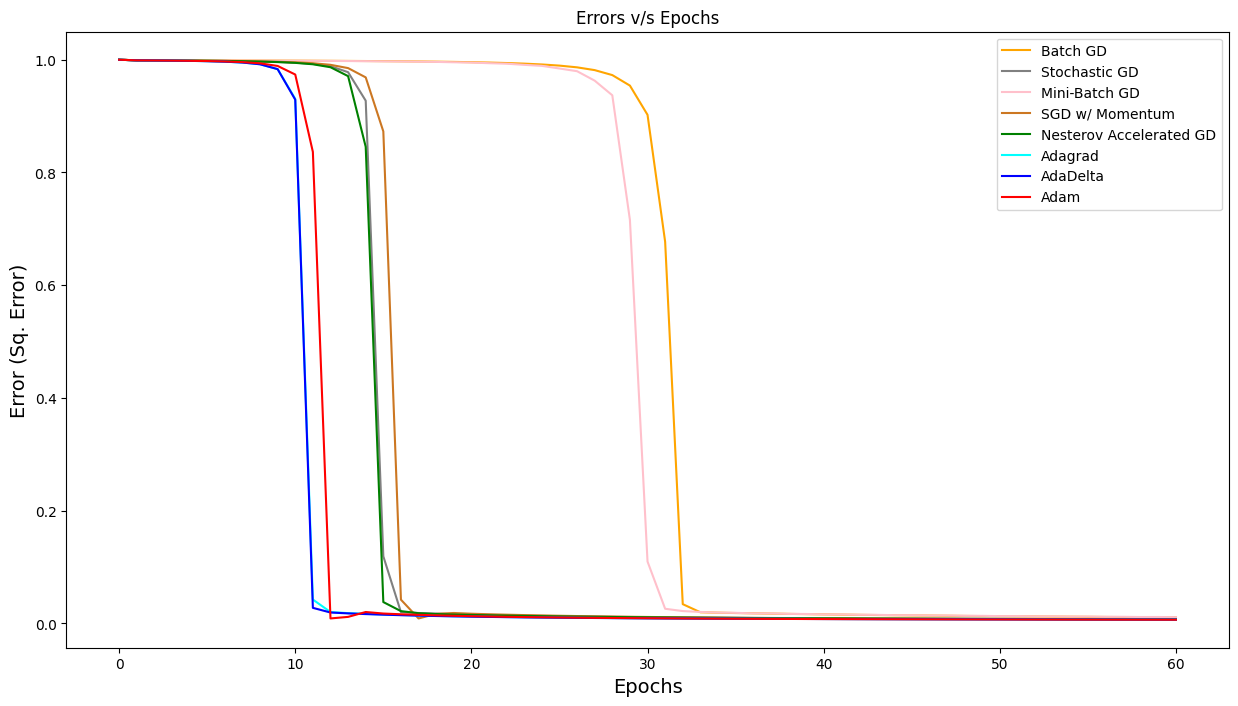

In [111]:
collective_plotter_2D(plot_epoch_range, [errors_bgd, errors_sgd, errors_mbgd, errors_sgdm, errors_nagd, errors_adag, errors_adadelta, errors_adam], start_error, plot_colors, "Errors v/s Epochs", "Epochs", "Error (Sq. Error)", plot_legend)